<div style="font-size:25pt">TWEEPY</div>

interesting functions:<br>
https://www.programcreek.com/python/example/76301/tweepy.Cursor

# Imports

In [1]:
import tweepy
import pandas as pd
from tweepy.cursor import Cursor
from newsanalyser.utils import text_cleaner
from newsanalyser.tweeter_utils import *
from newsanalyser.textblob_utils import *

# Connect to Twitter

In [2]:
api = tweeter_authenticate()

# Getting Tweets from a specific user

In [3]:
df = get_tweets_from_username(api, "britneyspears")

Getting tweets before 1040316521090871300
... 390 tweets downloaded so far
Getting tweets before 947681772199993343
... 588 tweets downloaded so far
Getting tweets before 857017002845589503
... 788 tweets downloaded so far
Getting tweets before 799527269924540416
... 987 tweets downloaded so far
Getting tweets before 769606860651401215
... 1180 tweets downloaded so far
Getting tweets before 745711882112163839
... 1379 tweets downloaded so far
Getting tweets before 662397775850709000
... 1579 tweets downloaded so far
Getting tweets before 600127125748744191
... 1777 tweets downloaded so far
Getting tweets before 567874379708788735
... 1977 tweets downloaded so far
Getting tweets before 515212368339795968
... 2176 tweets downloaded so far
Getting tweets before 430883484295376895
... 2376 tweets downloaded so far
Getting tweets before 411239077950652416
... 2575 tweets downloaded so far
Getting tweets before 407943932681527295
... 2772 tweets downloaded so far
Getting tweets before 403069

In [4]:
df["full_text"][0:10]

0    Pssss this is me celebrating by horseback ridi...
1    Coming along, folks ... coming along 🖕🏻!!!!! N...
2    Bringing it back to the 2000s when everything ...
3    We all have our own ways to work on our bodies...
4    like last night when I ate a container of pean...
5    In the past two weeks I've said that's it ... ...
6    I found my lace and leather catsuit this time ...
7    I’ve missed going to the movies a lot this pas...
8    Maybe we should have a rematch 🙊💪🏼🥊 ... I mean...
9    I was extremely taken back and still am to thi...
Name: full_text, dtype: object

# Clean Tweets

In [5]:
cleaner = text_cleaner(df = df, label="full_text")

In [6]:
cleaned_df = cleaner.clean_texts()

In [7]:
cleaned_df["full_text"][0:10]

0    ps is celebrating horseback riding cartwheel t...
1    coming along folk coming along new real repres...
2    bringing back everything simpler social medium...
3    have way work body respect cause should hope d...
4    like last night ate container peanut hit might...
5    past two week said have got get shape consider...
6    found lace leather catsuit time never worn any...
7    missed going movie lot past year excited final...
8    maybe should have rematch mean thing have chan...
9    extremely taken back still day play wrestled h...
Name: full_text, dtype: object

# Plot number of tweets per day recently

In [8]:
cleaned_df["created_at"] = cleaned_df["created_at"].apply(pd.to_datetime)
cleaned_df.sort_values(by="created_at", inplace=True)
cleaned_df["created_at"] = cleaned_df["created_at"].apply(lambda x: x.strftime("%Y/%m/%d"))

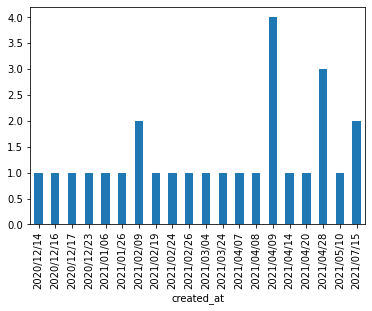

In [9]:
cleaned_df.groupby("created_at").count()["id_str"][-20:].plot(kind="bar");

# Plot Tweets from a specific day

In [10]:
k=0
for text in cleaned_df[cleaned_df["created_at"] == "2021/08/09"].reset_index(drop=True)["full_text"]:
    k+=1
    print(str(k) + ")" + text + "\n")

# Plot word cloud

In [11]:
cleaned_df = add_subjectivity_and_polarity(cleaned_df)

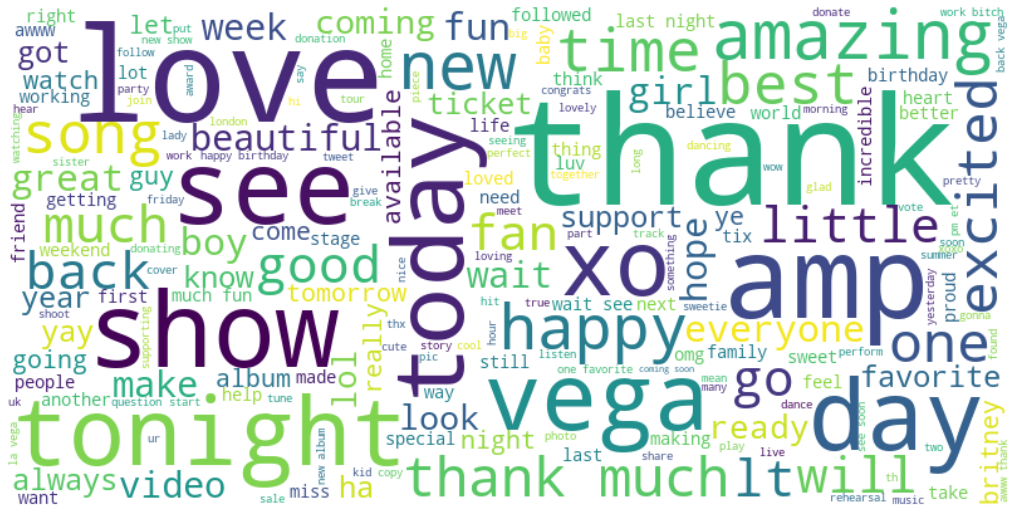

In [12]:
plot_wordcloud(cleaned_df)

# Calculate Tweets overall sentiment with TextBlob

In [13]:
cleaned_df = add_textblob_analysis(cleaned_df)

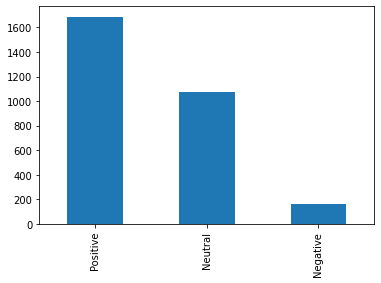

In [14]:
cleaned_df["textblob_analysis"].value_counts().plot(kind="bar");

# Getting Tweets from a hashtag

In [ ]:
df_searched = get_tweets_from_search(api, "$CVX", parameters=" -filter:retweets", since="2021-08-09", lang="en", max_tweets=1000)

In [5]:
df_searched

,text
0,Every Time\nIt’s Making Us $321 Per Day\nJoin:...
1,TOP TICKERS 08/14 @ 03:30EST\n7: $COIN\n5: $TS...
2,🟢 Swapped $200K in $USDT for $CVX on #1inch 🐉\...
3,CRYPTOMARKET DAILY OVERVIEW\n\nWithin the last...
4,$crv $sushi $eth $bnb $cvx what more u need? h...
...,...
595,2021-08-06 Short sale volume (not short intere...
596,Indonesia's Pertamina takes over Rokan block o...
597,$PBR $CVX $FANG $COP https://t.co/JUk9wwMilw
598,Alessio: Transport and S&amp;P divergence - n...


# Clean texts

In [6]:
cleaner_search = text_cleaner(df = df_searched, label="text", included_sw=[], excluded_sw=[])#, stopwords_locale="french")

In [7]:
cleaned_df_search = cleaner_search.clean_texts()

In [8]:
cleaned_df_search

,text,vocabulary_richness
0,every time making per day join btc eth step cv...,0.818182
1,top ticker est coin tsla clov mrna pfe pltr am...,1.000000
2,swapped usdt cvx,1.000000
3,cryptomarket daily overview within last day to...,0.794118
4,crv sushi eth bnb cvx need,1.000000
...,...,...
595,short sale volume short interest pbr bp ptr cvx,0.888889
596,indonesia pertamina take rokan block operation...,1.000000
597,pbr cvx fang cop,1.000000
598,alessio transport amp divergence non confirmat...,0.931034


# Add subjectivity and polarity

In [10]:
cleaned_df_search = add_subjectivity_and_polarity(cleaned_df_search, label="text")
cleaned_df_search.head()

,text,vocabulary_richness,subjectivity,polarity
0,every time making per day join btc eth step cv...,0.818182,0.000000,0.000000
1,top ticker est coin tsla clov mrna pfe pltr am...,1.000000,0.500000,0.500000
2,swapped usdt cvx,1.000000,0.000000,0.000000
3,cryptomarket daily overview within last day to...,0.794118,0.480952,-0.038095
4,crv sushi eth bnb cvx need,1.000000,0.000000,0.000000


# Plot wordcloud

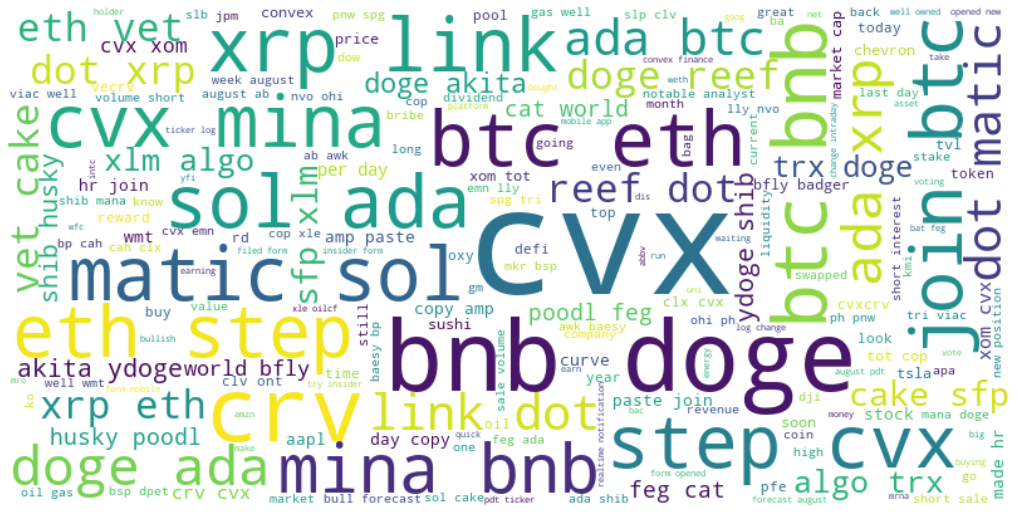

In [12]:
plot_wordcloud(cleaned_df_search, label="text")

# Calculate overall sentiment of tweets

In [13]:
cleaned_df_search = add_textblob_analysis(cleaned_df_search)

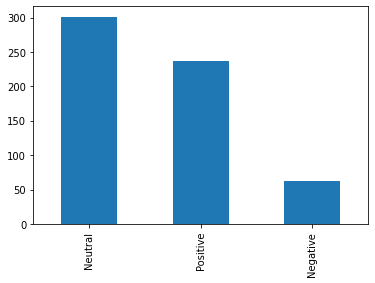

In [14]:
cleaned_df_search["textblob_analysis"].value_counts().plot(kind="bar");